In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
data_train = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/training_set_for_turn_detection.xlsx')

In [76]:
data_test = pd.read_csv('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/test.csv')

In [77]:
y_test = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/y_test.xlsx')

In [78]:
#x = [['std','interquartilerange','range','variance']]
#y = ['feature']

In [79]:
data_train.head()

,std,interquartilerange,range,variance,feature
0,1.893093,0.744145,6.10639,3.583801,0
1,12.137999,11.900842,45.21478,147.331026,1
2,3.861983,2.967290,13.48541,14.914914,0
3,2.806293,1.340335,10.49092,7.875282,0
4,4.436192,7.716569,11.91696,19.679798,0


In [80]:
data_test.head()

,time_stamp,ori,Unnamed: 2,Unnamed: 3
0,1582892149513,183.32074,-23.296076,-8.208767
1,1582892149530,183.43580,-23.217299,-8.004543
2,1582892149550,183.55615,-22.962630,-7.778291
3,1582892149570,183.67781,-22.410380,-7.610994
4,1582892149588,183.78986,-22.059351,-7.418176


In [81]:
x_train = data_train.drop('feature', axis=1)

In [82]:
x_train

,std,interquartilerange,range,variance
0,1.893093,0.744145,6.10639,3.583801
1,12.137999,11.900842,45.21478,147.331026
2,3.861983,2.967290,13.48541,14.914914
3,2.806293,1.340335,10.49092,7.875282
4,4.436192,7.716569,11.91696,19.679798
...,...,...,...,...
76,0.404348,0.373337,1.47731,0.163497
77,1.453080,1.583342,4.87724,2.111441
78,0.853801,0.680217,2.70630,0.728977
79,7.509932,8.070282,21.75329,56.399084


In [83]:
y_train = data_train['feature']

In [84]:
y_train

0     0
1     1
2     0
3     0
4     0
     ..
76    0
77    0
78    0
79    1
80    1
Name: feature, Length: 81, dtype: int64

In [85]:
y_test = y_test['feature']

In [86]:
y_test

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
Name: feature, dtype: int64

In [87]:
data_test

,time_stamp,ori,Unnamed: 2,Unnamed: 3
0,1582892149513,183.32074,-23.296076,-8.208767
1,1582892149530,183.43580,-23.217299,-8.004543
2,1582892149550,183.55615,-22.962630,-7.778291
3,1582892149570,183.67781,-22.410380,-7.610994
4,1582892149588,183.78986,-22.059351,-7.418176
...,...,...,...,...
3242,1582892211669,247.86797,-12.165248,-4.408528
3243,1582892211688,247.90600,-12.178048,-4.348655
3244,1582892211709,247.95145,-12.298545,-4.349805
3245,1582892211729,248.02710,-12.533242,-4.275261


In [88]:
# Dividing the data into windows
time_stamp_windows = []

last = len(data_test) // 100

for i in range(last):
    time_stamp_windows.append(data_test.iloc[i*100:i*100+100]['time_stamp'])
    
time_stamp_windows.append(data_test.iloc[last*100:-1]['time_stamp'])

In [89]:
# Dividing the data 'ori' column into windows
windows = []

last = len(data_test) // 100

for i in range(last):
    windows.append(data_test.iloc[i*100:i*100+100]['ori'])
    
windows.append(data_test.iloc[last*100:-1]['ori'])

In [90]:
len(windows)

33

In [91]:
firstquart = []
secondquart = []
thirdquart = []
for var in windows: 
    var1quart = var.quantile(.25)
    var2quart = var.quantile(.5)
    var3quart = var.quantile(.75)
    firstquart.append(var1quart.transpose())
    secondquart.append(var2quart.transpose())
    thirdquart.append(var2quart.transpose())
    

In [92]:
i=1
for x in windows:
    y=x
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/window/window'+str(i)+'.xlsx')
    y = x.describe()
    y['interquartilerange'] = thirdquart[i-1] - firstquart[i-1]
    y['range'] = y['max'] - y['min']
    y['variance'] = y['std']**2
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    i+=1


In [93]:
y

count                  46.000000
mean                  247.547621
std                     0.373976
min                   246.874150
25%                   247.114370
50%                   247.742180
75%                   247.821240
max                   248.027100
interquartilerange      0.627810
range                   1.152950
variance                0.139858
Name: ori, dtype: float64

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
x_test = pd.DataFrame()
for i in range(1,len(windows)+1):
    df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    dfff = pd.DataFrame(pd.Series({'std':df.loc[2,'ori'],'interquartilerange':df.loc[8,'ori'],'range':df.loc[9,'ori'], 'variance':df.loc[10,'ori']}))
    new_df=dfff.transpose()
    x_test = x_test.append(new_df.iloc[0])
x_test = x_test[['std','interquartilerange','range','variance']]

    

In [96]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [97]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
#predictions = []
#for i in range(1,len(windows)+1):
    #df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    #dff = pd.DataFrame(pd.Series({'std':df.loc[2,'ori'],'interquartilerange':df.loc[8,'ori'],'range':df.loc[9,'ori'], 'variance':df.loc[10,'ori']}))
    #x_test=dff.transpose()
    #predictions.append(dtree.predict(x_test)[0])

In [99]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [102]:
print(confusion_matrix(y_test,predictions))

[[28  1]
 [ 0  4]]


In [103]:
marker = ['N']*len(windows)

In [104]:
j =0
for i in predictions:
    if i == 1:
        marker[j] = 'T'
    j=j+1
    

In [105]:
#marker

In [106]:
font_dict = {'family':'serif', 'color':'darkred', 'size':15 }

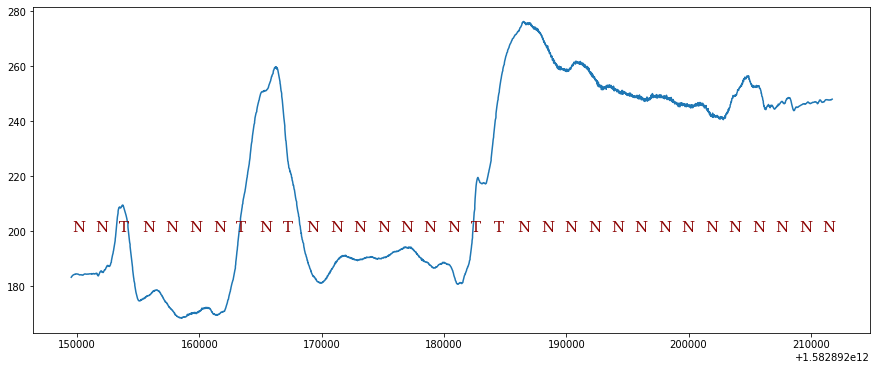

In [107]:
plt.figure(figsize = (15,6))
plt.plot(data_test['time_stamp'], data_test['ori'])
for i in range(len(marker)):
    plt.text(time_stamp_windows[i].iloc[0]+50, 200, marker[i], fontdict = font_dict)
plt.show()